In [82]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy.optimize import curve_fit

In [2]:
data7 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/data_pre2017.dir/399 Wavemeter Line Scan.dir/00007 - 399 Wavemeter Line Scan.csv',delimiter=',')
data11 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/data_pre2017.dir/399 Wavemeter Line Scan.dir/00011 - 399 Wavemeter Line Scan.csv',delimiter=',')
data12 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/data_pre2017.dir/399 Wavemeter Line Scan.dir/00012 - 399 Wavemeter Line Scan.csv',delimiter=',')
data13 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/data_pre2017.dir/399 Wavemeter Line Scan.dir/00013 - 399 Wavemeter Line Scan.csv',delimiter=',')
data14 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/data_pre2017.dir/399 Wavemeter Line Scan.dir/00014 - 399 Wavemeter Line Scan.csv',delimiter=',')
data15 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/data_pre2017.dir/399 Wavemeter Line Scan.dir/00015 - 399 Wavemeter Line Scan.csv',delimiter=',')

In [3]:
def coursen(xdata,ydata,points):
    newlength = int(len(xdata)/points)
    newxdata = []
    newydata = []
    j = 0
    for i in range(newlength):
        i = points*(i)
        newydata.append(np.mean(ydata[int(j):int(i)]))
        newxdata.append(xdata[int((i + j)/2)])
        j = i
    return newxdata, newydata

/home/qsimexpcontrol/.local/lib/python2.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/qsimexpcontrol/.local/lib/python2.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


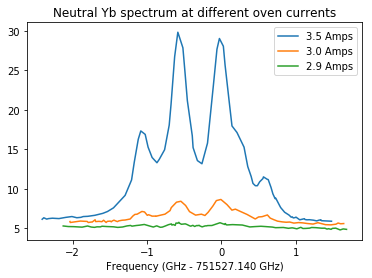

In [4]:
rescaled7x = (data7[:,0] - 751527140000000)* 1e-9
newx7, newy7 = coursen(rescaled7x , data7[:,1], 10)
newx13, newy13 = coursen(data13[:,0],data13[:,1], 10)
newx15, newy15 = coursen(data15[:,0],data15[:,1], 10)
plt.plot(newx7,newy7, label = '3.5 Amps')
plt.plot(newx13,newy13,label = '3.0 Amps')
plt.plot(newx15,newy15,label = '2.9 Amps')
plt.xlabel('Frequency (GHz - 751527.140 GHz)')
plt.title('Neutral Yb spectrum at different oven currents')
plt.legend()
#plt.savefig('/home/qsimexpcontrol/plots/Neutral Flourescence/nuetralflourescence.pdf')

In [6]:
plt.plot(data13[:,0], data13[:,1],label = 'raw 2 minute data')

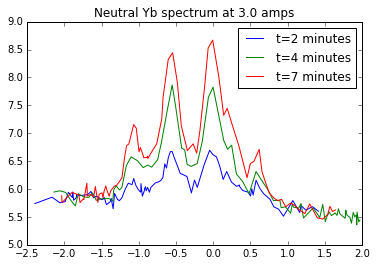

In [17]:
newx11, newy11 = coursen(data11[:,0],data11[:,1], 10)
newx12, newy12 = coursen(data12[:,0],data12[:,1], 10)
newx13, newy13 = coursen(data13[:,0],data13[:,1], 10)

plt.plot(newx11,newy11,label = 't=2 minutes')
plt.plot(newx12,newy12,label = 't=4 minutes')
plt.plot(newx13,newy13,label = 't=7 minutes')
plt.title('Neutral Yb spectrum at 3.0 amps')
plt.legend()
#plt.savefig('/home/qsimexpcontrol/plots/Neutral Flourescence/nuetralflourescencevstime.pdf')

In [18]:
data22 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/data_pre2017.dir/399 Wavemeter Line Scan.dir/00022 - 399 Wavemeter Line Scan.csv',delimiter=',')
data23 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/data_pre2017.dir/399 Wavemeter Line Scan.dir/00023 - 399 Wavemeter Line Scan.csv',delimiter=',')

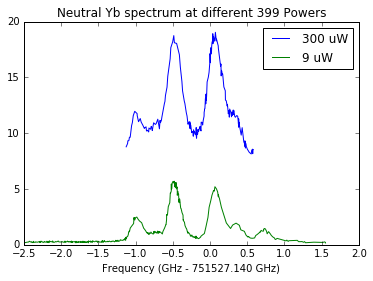

In [19]:
newx22, newy22 = coursen(data22[:,0],data22[:,1], 2)
newx23, newy23 = coursen(data23[:,0],data23[:,1], 2)
plt.plot(newx22,newy22 ,label = '300 uW')
plt.plot(newx23,newy23,label = '9 uW')
plt.xlim([-2.5, 2.0])
plt.xlabel('Frequency (GHz - 751527.140 GHz)')
plt.title('Neutral Yb spectrum at different 399 Powers')
plt.legend()
#plt.savefig('/home/qsimexpcontrol/plots/Neutral Flourescence/powerbroadening.pdf')

In [6]:
data31 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/data_pre2017.dir/399 Wavemeter Line Scan.dir/00031 - 399 Wavemeter Line Scan.csv',delimiter=',')
data32 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/data_pre2017.dir/399 Wavemeter Line Scan.dir/00032 - 399 Wavemeter Line Scan.csv',delimiter=',')

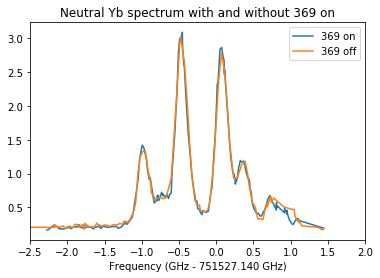

In [7]:
newx31, newy31 = coursen(data31[:,0],data31[:,1], 6)
newx32, newy32 = coursen(data32[:,0],data32[:,1], 6)
plt.plot(newx31,newy31 ,label = '369 on')
plt.plot(newx32,newy32,label = '369 off')
plt.xlim([-2.5, 2.0])
plt.xlabel('Frequency (GHz - 751527.140 GHz)')
plt.title('Neutral Yb spectrum with and without 369 on')
plt.legend()
#plt.savefig('/home/qsimexpcontrol/plots/Neutral Flourescence/ionization_attempt.pdf')

In [9]:
xdata = np.array([3.64,3.54,3.44, 3.20, 3.11, 3.05])
ydata = np.array([1.64,1.109,0.713, 0.392, 0.283, 0.171])

[3.11622533e-06 2.76658865e-01]


(0, 1.8)

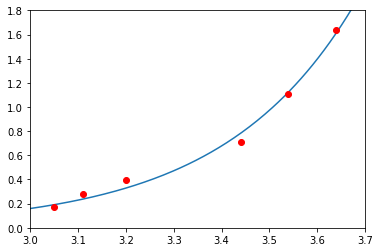

In [10]:
def expfunc(x, a, b):
   return a*np.exp(x/b)

expfit, pcov1 = curve_fit(expfunc, xdata,ydata, p0=[1,1])
    #gaussian function used in fitting routine
print expfit
x = np.linspace(1,5,1000)
plt.plot(x, expfit[0]*np.exp(x/expfit[1]))
plt.plot(xdata[::-1],ydata[::-1],'ro')
plt.xlim([3.0,3.7])
plt.ylim([0,1.8])
#plt.savefig('/home/qsimexpcontrol/plots/Neutral Flourescence/atomsvsovencurrent.pdf')

[-0.9777683   0.2104429   0.46759259] [-0.46997318  0.18840714  0.90892084] [0.07538353 0.19938265 0.9158009 ]


Text(0.5,1,'Neutral Yb spectrum')

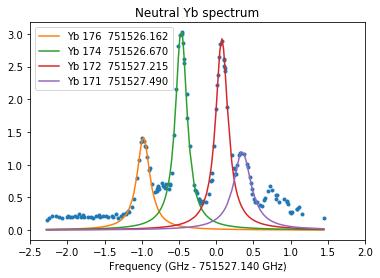

In [20]:
def lorentzfunc(x, x0, gamma, A):
   return (A/(2*np.pi)) * gamma/((x - x0)**2 + (gamma/2)**2)

lorentzfit176, pcov1 = curve_fit(lorentzfunc, data31[255:340,0],data31[255:340,1], p0=[-1.0,0.01, 1])
lorentzfit174, pcov1 = curve_fit(lorentzfunc, data31[420:605,0],data31[420:605,1], p0=[-0.47,0.2, 1])
lorentzfit172, pcov1 = curve_fit(lorentzfunc, data31[610:760,0],data31[610:760,1], p0=[0.077,0.22, 1])
lorentzfit171, pcov1 = curve_fit(lorentzfunc, data31[770:840,0],data31[770:840,1], p0=[0.45,0.22, 1])

print lorentzfit176, lorentzfit174, lorentzfit172
newx31, newy31 = coursen(data31[:,0],data31[:,1], 7)
plt.plot(newx31,newy31, '.')
plt.plot(newx31, lorentzfunc(newx31, lorentzfit176[0], lorentzfit176[1], lorentzfit176[2]), label = 'Yb 176  '
         +str(lorentzfit176[0] + 751527.140)[0:10])
plt.plot(newx31, lorentzfunc(newx31, lorentzfit174[0], lorentzfit174[1], lorentzfit174[2]), label = 'Yb 174  '
         +str(lorentzfit174[0] + 751527.140)[0:10])
plt.plot(newx31, lorentzfunc(newx31, lorentzfit172[0], lorentzfit172[1], lorentzfit172[2]), label = 'Yb 172  '
         +str(lorentzfit172[0] + 751527.140)[0:10])
plt.plot(newx31, lorentzfunc(newx31, lorentzfit171[0], lorentzfit171[1], lorentzfit171[2]), label = 'Yb 171  '
         +str(lorentzfit171[0] + 751527.140)[0:10])
plt.xlim([-2.5, 2.0])
plt.xlabel('Frequency (GHz - 751527.140 GHz)')
plt.legend(loc=2, prop={'size':10})
plt.title('Neutral Yb spectrum')
#plt.savefig('/home/qsimexpcontrol/plots/Neutral Flourescence/spectrumwithlorentzfits.pdf')

0.3512697482915761
4.4912408711239165


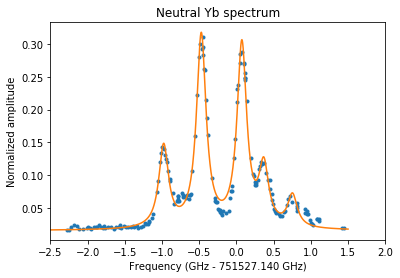

In [86]:
def lorentzfunc(x, x1, x2, x3, x4, x5, gamma, A1, A2, A3, A4, A5, offset):
   return (A1/(2*np.pi)) * gamma/((x - x1)**2 + (gamma/2)**2) + (A2/(2*np.pi)) * gamma/((x - x2)**2 + (gamma/2)**2) + (A3/(2*np.pi)) * gamma/((x - x3)**2 + (gamma/2)**2) + \
            (A4/(2*np.pi)) * gamma/((x - x4)**2 + (gamma/2)**2) + (A5/(2*np.pi)) * gamma/((x - x5)**2 + (gamma/2)**2) + offset

newx31, newy31 = coursen(data31[:,0],data31[:,1], 6)                                                                                                                                                            
lorentzfit, pcov1 = curve_fit(lorentzfunc, data31[:,0],data31[:,1], p0=[-1.0, -0.5, 0.1, 0.4, 0.7, 0.01, 1.5, 3.0, 2.8, 1.2, 0.8, 0.25])
therx = np.linspace(-2.5, 1.5, 5000)
print lorentzfit[7]/np.sum(lorentzfit[6:-1])
print lorentzfit[7]*2*np.pi
norm = 0.318/3.169
plt.plot(newx31, norm*np.array(newy31), '.')
plt.plot(therx, norm*np.array(lorentzfunc(therx, *lorentzfit)), label = 'Yb 176  '
         +str(lorentzfit176[0] + 751527.140)[0:10])

plt.xlim([-2.5, 2.0])
#plt.ylim([0.0, 0.45])
plt.xlabel('Frequency (GHz - 751527.140 GHz)')
plt.ylabel('Normalized amplitude')
#plt.legend(loc=2, prop={'size':10})
plt.title('Neutral Yb spectrum')
plt.savefig('/home/qsimexpcontrol/plots/Neutral Flourescence/spectrumwithmasterlorentzfits.pdf')

[0.14928856 0.35126975 0.33339858 0.10723261 0.0588105 ]
